# Milestone1: EDA

**author: UBC MDS Block 3 Group 4**

**date: 2021-11-19**

## Imports and configurations
---

In [71]:
library(tidyverse)
library(readr)
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Checklist 1: Formulate research question
---

For this DSCI522 course, we will consider the following question:

**Predict the edibility of a mushroom. Will a given mushroom be predicted as poisonous or edible?** 

---


**Note:**
This EDA will be conducted based on and in addition to the `data/pandas_preliminary_eda_mushrooms.html` that's already rendered by the script `src/preliminary_pandas_eda.py`. Please open and check this html file and go over both together.

To answer the predictive question above, we plan to build a predictive classification model. As the first step towards building the model we will split the data into train and test data set(split at 80% and 20% level). This EDA will use the `train_df` dataset that has already been splitted well with `6499` rows.

## Checklist 2: Read in the data
---

In [148]:
mushrooms <- read_csv("../data/train_df.csv")

Rows: 6499 Columns: 23

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (22): class, cap-shape, cap-surface, cap-color, odor, gill-attachment, g...
lgl  (1): bruises


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



## Checklist 3: Check the Packaging
---

### Check the number of rows and columns

In [149]:
nrow(mushrooms)

[1] 6499

In [150]:
ncol(mushrooms)

[1] 23

### Examine the classes of each of the columns to make sure they are correctly specified

In [151]:
glimpse(mushrooms)

Rows: 6,499
Columns: 23
$ class                      <chr> "p", "e", "e", "e", "e", "p", "e", "e", "p"…
$ `cap-shape`                <chr> "f", "f", "b", "f", "x", "x", "f", "x", "f"…
$ `cap-surface`              <chr> "y", "f", "s", "f", "s", "f", "f", "s", "s"…
$ `cap-color`                <chr> "g", "g", "g", "n", "g", "g", "e", "g", "b"…
$ bruises                    <lgl> FALSE, FALSE, FALSE, TRUE, FALSE, FALSE, TR…
$ odor                       <chr> "f", "n", "n", "n", "n", "f", "n", "n", "f"…
$ `gill-attachment`          <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f"…
$ `gill-spacing`             <chr> "c", "w", "w", "c", "w", "c", "c", "w", "c"…
$ `gill-size`                <chr> "b", "b", "b", "b", "b", "b", "b", "b", "b"…
$ `gill-color`               <chr> "h", "h", "w", "n", "p", "p", "u", "n", "h"…
$ `stalk-shape`              <chr> "e", "t", "e", "t", "t", "e", "t", "t", "t"…
$ `stalk-root`               <chr> "b", "e", "?", "b", "e", "b", "b", "e", "b"…
$ `stalk-surface

The `mushrooms.csv` has 22 categorical variables and 1 logical variable. 

## Checklist 5: Look at the Top and the Bottom of the Data
---

In [152]:
head(mushrooms[, c(6:7, 10)])

odor,gill-attachment,gill-color
<chr>,<chr>,<chr>
f,f,h
n,f,h
n,f,w
n,f,n
n,f,p
f,f,p


In [153]:
tail(mushrooms[, c(6:7, 10)])

odor,gill-attachment,gill-color
<chr>,<chr>,<chr>
y,f,b
f,f,h
p,f,k
c,f,u
n,f,w
n,f,u


## Checklist 6: Check "n"s
---

### Check number of classes for our `target` variable which should be binary as expected. 

In [154]:
mushrooms |> select(class) |>  unique() |>  nrow()

[1] 2

In [155]:
unique(mushrooms$class)

[1] "p" "e"

**Here, 'p' is coded as 'poisonous' for short and 'e' is coded as 'edible' for short and they are two classes that we need to train a model to predict. More information can be referred to the codebook `data/agaricus-lepiota.name`.**

### Check any missing values for all columns

#### According to the `preliminary pandas EDA` html, there are no missing values for all columns and we will double check here. 

In [156]:
sum(is.na(mushrooms))

[1] 0

**No missing values as expected**

### Check any duplicates

#### According to the `preliminary pandas EDA` profile, there are no duplicates for all columns and we will double check here. 

In [157]:
nrow(mushrooms |> distinct() == mushrooms)

[1] 6499

**As expected, there are no duplicates**

### Check any missing attribute values. 

#### According to the codebook, the feature `stalk-root` has missing attributes that are denoted as `?`. We'll verify it here.

In [158]:
unique(mushrooms$`stalk-root`)

[1] "b" "e" "?" "c" "r"

Then we'll have to replace `?` with NAs. 

In [159]:
mushrooms$`stalk-root` <- na_if(mushrooms$`stalk-root`, "?")

In [160]:
sum(is.na(mushrooms$`stalk-root`))

[1] 1989

In [161]:
sum(is.na(mushrooms))

[1] 1989

**As expected, we have 1989 missing attributes (in the original dataset, there are 2480 missing attribute values before splitting) all in one feature column `stalk-root`. And $\frac{1989}{2480} = 0.8$ which is correctly following the way we splitted the data (80% train and 20% test)**

**After converting it to `NAs`, we now have 1989 missing values that can't be detected by the `pandas_preliminary_eda` profile. We will use `SimpleImputer()` to impute values to deal with these NAs and make sure that we still have enough data to work with**

## Checklist 7: Validate With at Least One External Data Source
---

According to the `Mushroom Glossary`(https://biolwww.usask.ca/fungi/glossary.html) we can see that the types of cap shape of mushrooms are as below:

<img src="../data/img/cap_shape.png">

In [162]:
unique(mushrooms$`cap-shape`)

[1] "f" "b" "x" "k" "c" "s"

**According to the codebook:
bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s**

The classes of mushroom's cap shapes are coded as what we'd expect, given the diagram provided by `Lincoff, G. H. 1981 National Audubon Society Field Guide to North American Mushrooms. Alfred A. Knopf, New York. ISBN 0-394-51992-2`. 

## Checklist 8: Make a Plot
---

In [163]:
colnames(mushrooms)

[1] "class"                    "cap-shape"               
 [3] "cap-surface"              "cap-color"               
 [5] "bruises"                  "odor"                    
 [7] "gill-attachment"          "gill-spacing"            
 [9] "gill-size"                "gill-color"              
[11] "stalk-shape"              "stalk-root"              
[13] "stalk-surface-above-ring" "stalk-surface-below-ring"
[15] "stalk-color-above-ring"   "stalk-color-below-ring"  
[17] "veil-type"                "veil-color"              
[19] "ring-number"              "ring-type"               
[21] "spore-print-color"        "population"              
[23] "habitat"

In [164]:
features <- c("class",
            "cap_shape",
            "cap_surface",
            "cap_color",
            "bruises",
            "odor",
            "gill_attachment",
            "gill_spacing",
            "gill_size",
            "gill_color",
            "stalk_shape",
            "stalk_root",
            "stalk_surface_above_ring",
            "stalk_surface_below_ring",
            "stalk_color_above_ring",
            "stalk_color_below_ring",
            "veil_type",
            "veil_color",
            "ring_number",
            "ring_type",
            "spore_print_color",
            "population",
            "habitat")
colnames(mushrooms) <- features

In [174]:
mush_features <- colnames(mushrooms)[-1]


gp <- map(mush_features, function(x) { 
  ggplot(data=mushrooms, 
         aes(x = eval(parse(text=x)), fill = class)) + 
    geom_bar() + 
    xlab(x) + 
    scale_fill_manual("legend", 
                      values = c("e" = "salmon", 
                                 "p" = "purple")) + 
    ggtitle("") + theme_bw()})

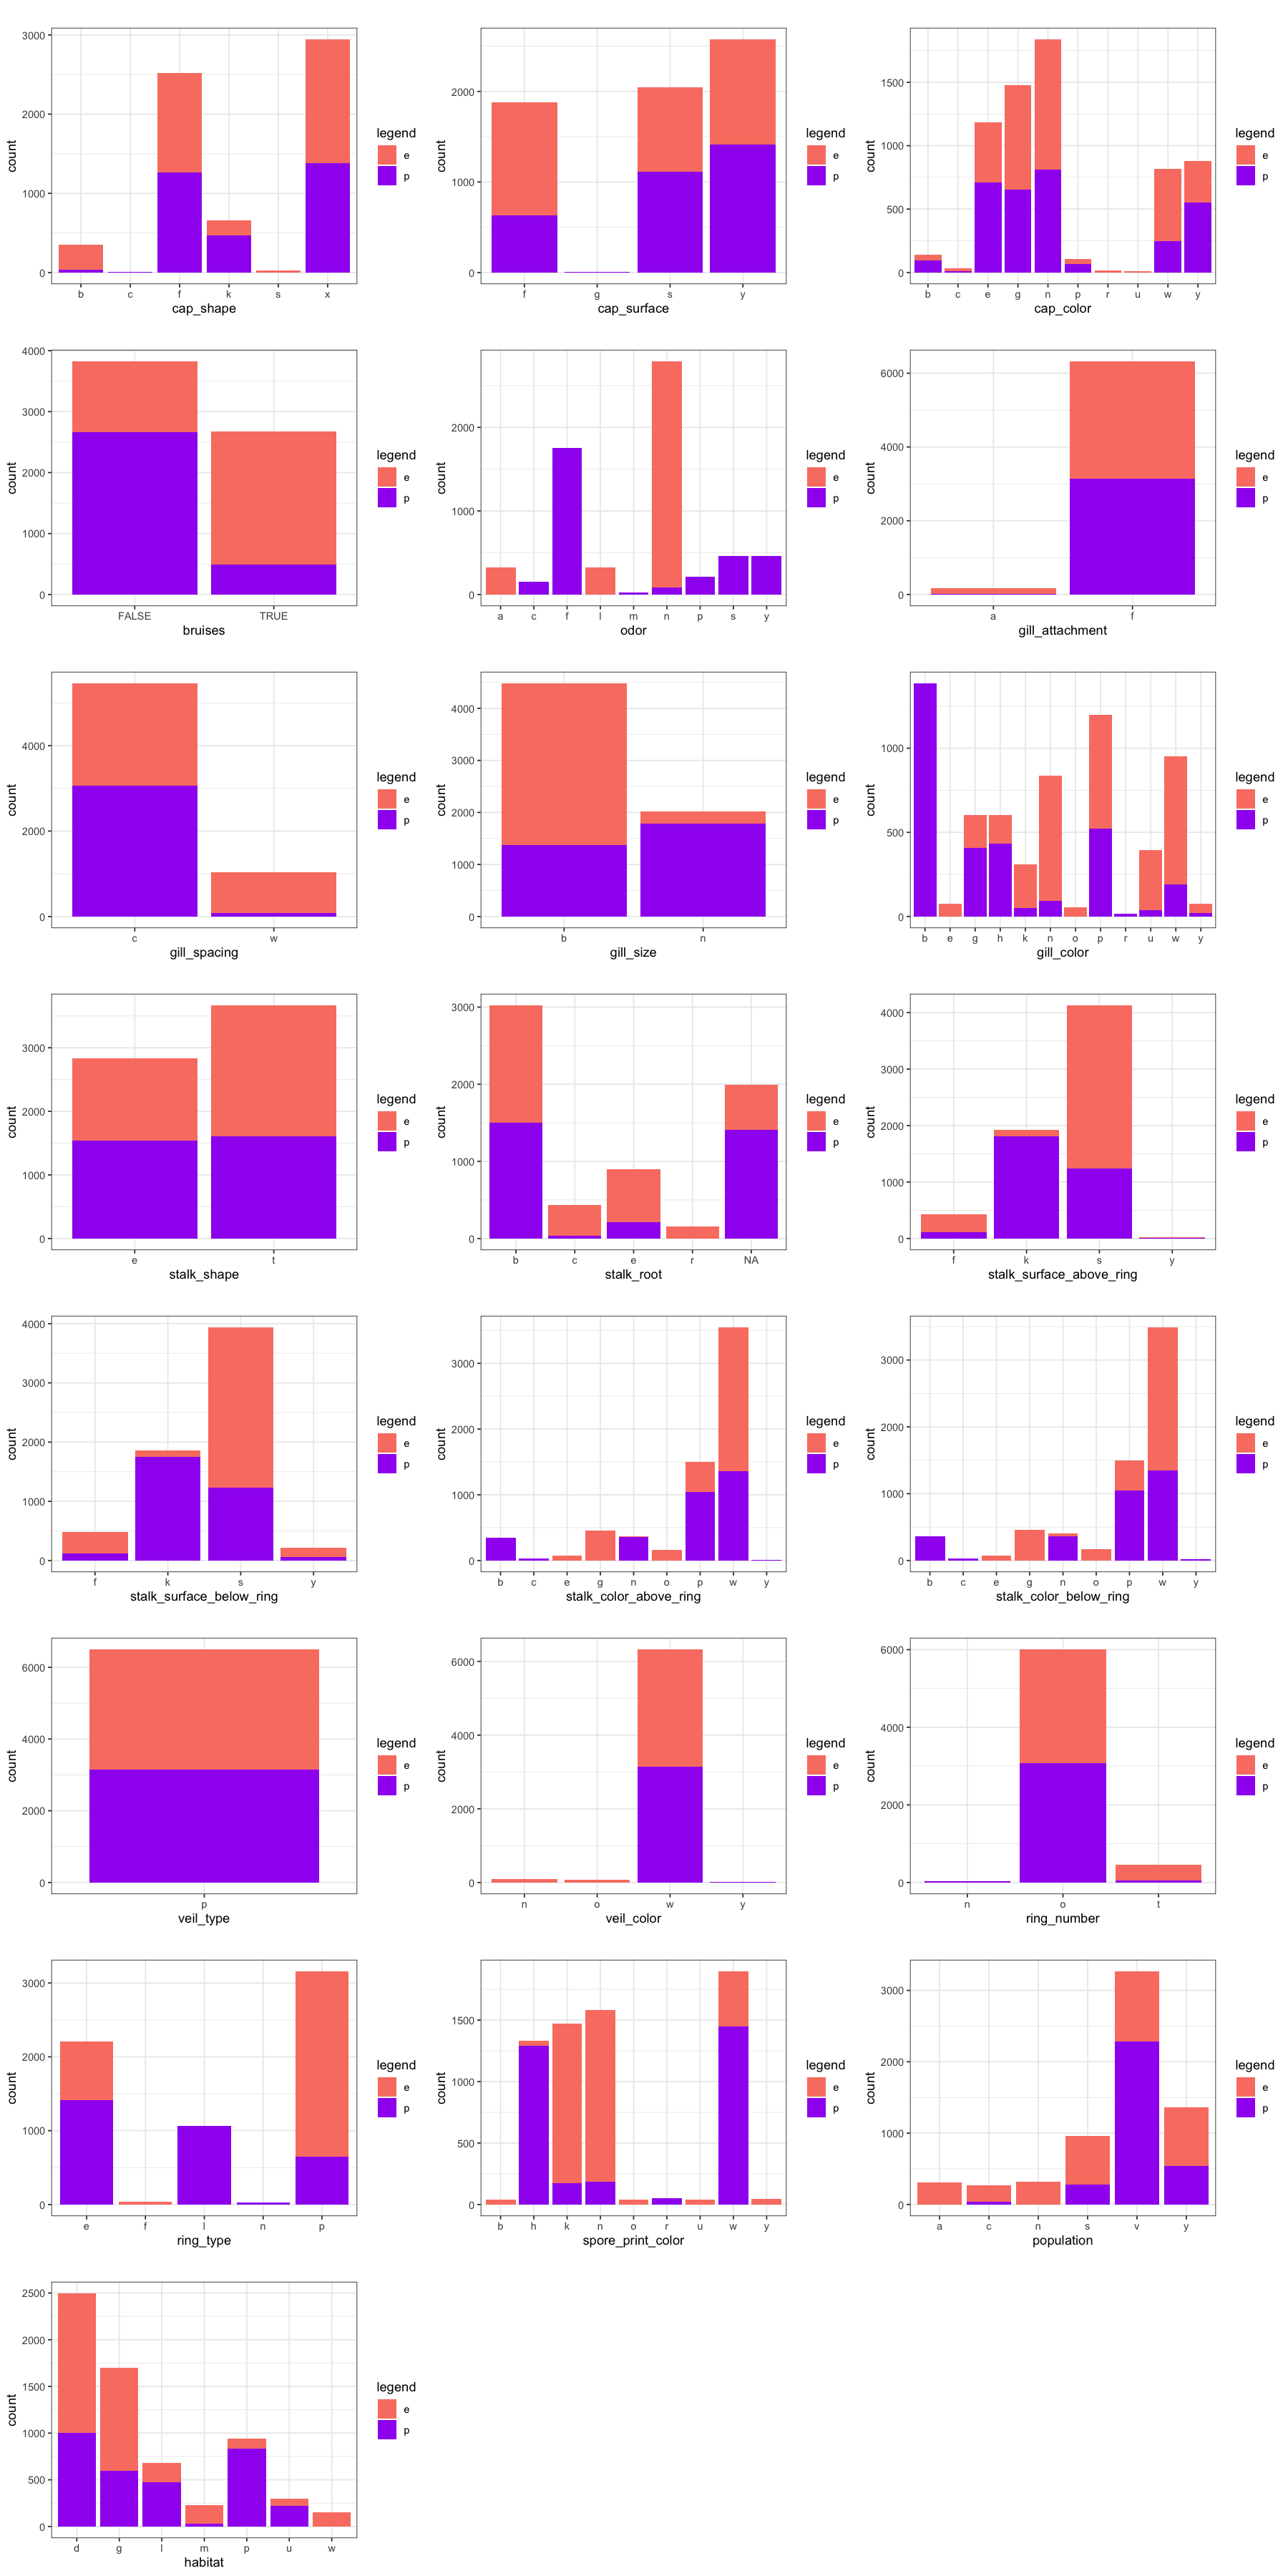

In [175]:
options(repr.plot.width = 15, repr.plot.height = 30)
do.call("grid.arrange", c(gp, ncol = 3))  

**The plots in `data/pandas_preliminary_eda_mushrooms.html` only shows the bar plots for each feature column. We built upon that to reveal how edible/poisonous mushrooms are segmented across their multiple features.**

Some observations that may be relevant for our classification:

* only edible mushrooms have sunken(s) cap-shape;

* only poisonous mushrooms have cap-surface with grooves(g);

* only edible mushrooms have green(r) or purple(u) cap-color;

* `odor is strongly indicative of what mushrooms are (edible/poisonous)` (it is also reflected in the pandas proliminary eda profile);

* only poisonous mushrooms have buff(b) or green(r) gill color;

* only edible mushrooms have red(e) or orange(o) gill color;

* only edible mushrooms have rooted stalk root(r);

* `stalk_color_above_ring` and `stalk_color_below_ring` are relevant features for our classification problem;

* only edible mushrooms have brown(n) and orange(o) veil color;

* only poisonous mushrooms have yellow(y) veil color;

* only poisonous mushrooms do not have rings(n);

* only edible mushrooms have flaring ring type(f);

* only poisonous mushrooms have none ring type(n);

* only edible mushrooms have black(b), orange(o), purple(u) or yellow(y) spore print color;

* only poisonous mushrooms have green(r) spore print color;

* only edible mushrooms have abundant(a) or numerous(n) population;

* only edible mushrooms have waste(w) type habitat.

#### Correlation Matrix from Preliminary EDA using Pandas Profiling

<img src="../data/img/correlation.png" width='600'>

**Cramér's V is an association measure for nominal random variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association.**

From the plot, we can observe that `odor`, `gill-color`, `pore-print-color`, `ring-type`, `stalk-color-above-ring` are features that show high association with our target variable `class`, which also confirm some of our observations above.

## Checklist 9: Try the Easy Solution First
---

### We run chi-square tests in order to check for the significative relationship between several mushroom features that show high association and their classification as edible or poisonous.

In [167]:
chisq.test(mushrooms$odor, mushrooms$class)


	Pearson's Chi-squared test

data:  mushrooms$odor and mushrooms$class
X-squared = 6157.8, df = 8, p-value < 2.2e-16


In [168]:
chisq.test(mushrooms$gill_color, mushrooms$class)


	Pearson's Chi-squared test

data:  mushrooms$gill_color and mushrooms$class
X-squared = 3004.8, df = 11, p-value < 2.2e-16


In [169]:
chisq.test(mushrooms$ring_type, mushrooms$class)


	Pearson's Chi-squared test

data:  mushrooms$ring_type and mushrooms$class
X-squared = 2400.7, df = 4, p-value < 2.2e-16


In [170]:
chisq.test(mushrooms$ring_type, mushrooms$class)


	Pearson's Chi-squared test

data:  mushrooms$ring_type and mushrooms$class
X-squared = 2400.7, df = 4, p-value < 2.2e-16


**Based on reported p-values, Those features with two or more levels are all significative in further classification.**

**Note:**
The `veil_type` is the only categorical feature with one level, as confirmed below.

In [171]:
unique(mushrooms$veil_type)

[1] "p"

## Checklist 10 Follow-up Questions
---

### 1. Do you have the right data?

In this case, the `mushrooms` data set seemed perfectly fine for answering the question of predicting whether a mushroom is poisonous or edible.

### 2. Do you need other data? 

Given the size and features of the dataset, it is quite sufficient for answering our research question. However, it’s worth noting that the dataset was made to the public in 1987 which is quite a long time ago. Some of their measurements of certain features of mushrooms may be updated in the recent days. So it will be important that we obtain the new information. 

### 3. Do you have the right question?

As mentioned by the codebook guideline, "There is no simple rule for determining the edibility of a mushroom" but it would be a promising direction to train a model to predict the edibility of a mushroom using these related mushroom features.